<a href="https://colab.research.google.com/github/Aryanchib/DataScience_Assignment/blob/main/A9PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA:
# Task 1: Exploratory Data Analysis (EDA):

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import warnings
warnings.simplefilter('ignore')
df=pd.read_csv('/content/sample_data/wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [ ]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


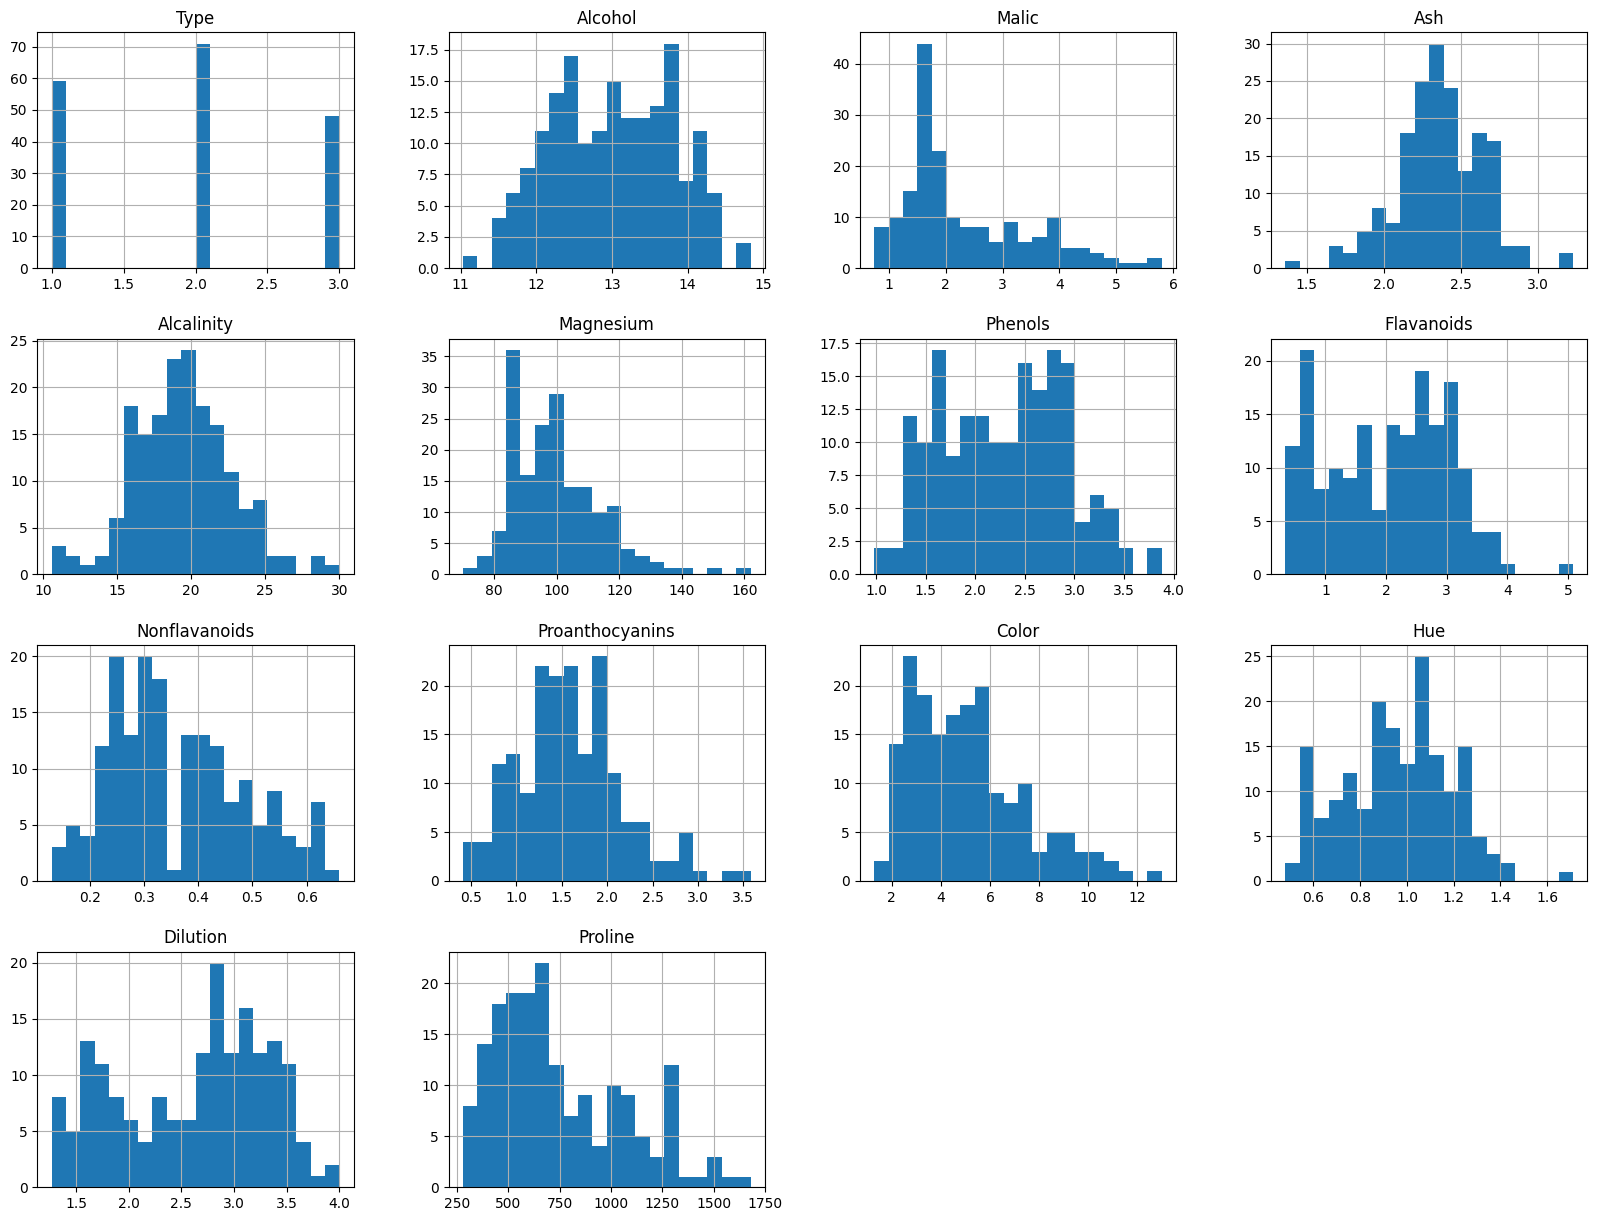

In [ ]:
df.hist(bins=20,figsize=(20,15))
plt.show()

<Axes: >

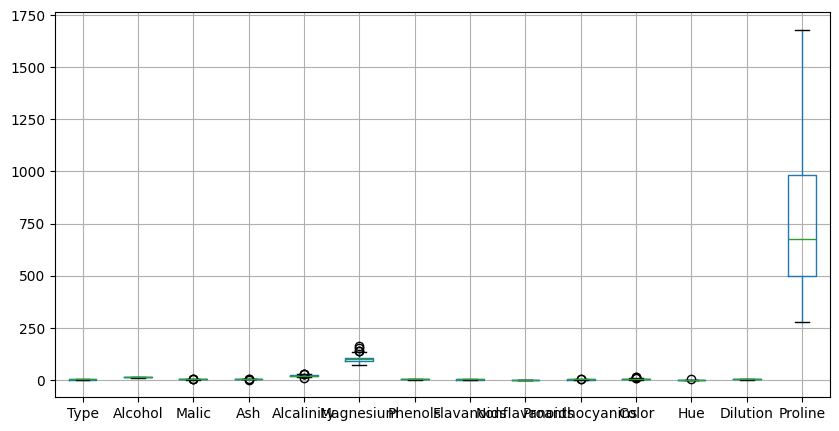

In [ ]:
df.boxplot(figsize=(10,5))

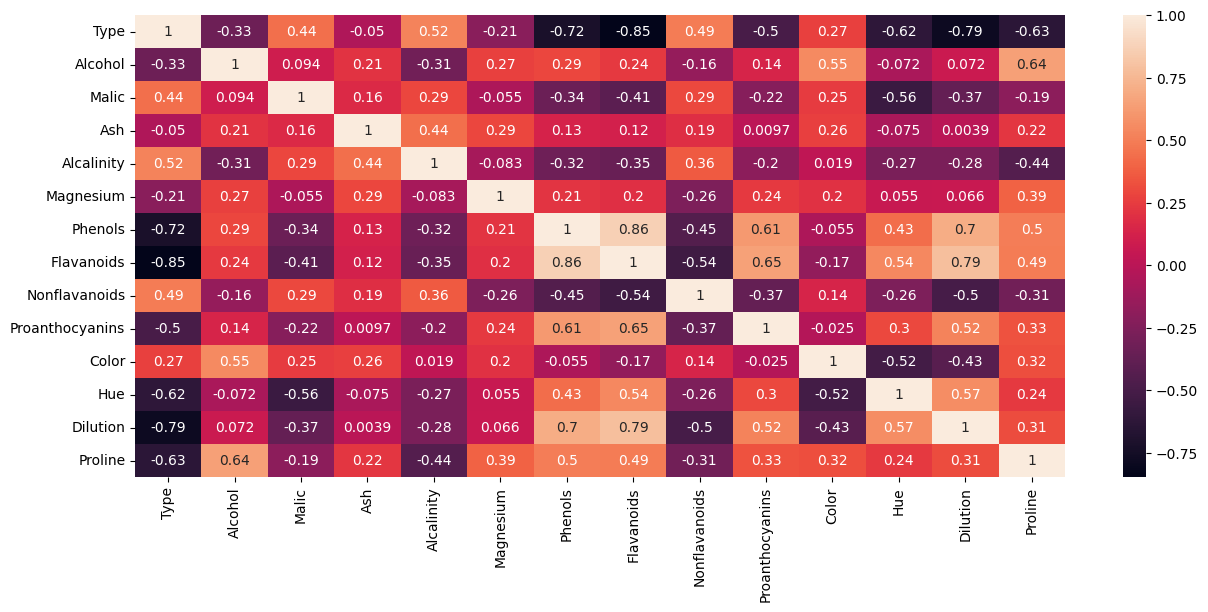

In [ ]:
correlation=df.corr()
plt.figure(figsize=(15,6))
heatma=sn.heatmap(correlation,annot=True)

# Task 2: Dimensionality Reduction with PCA:

In [ ]:
from sklearn.preprocessing import scale
norm=scale(df)
norm

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_val=pca.fit_transform(norm)
pca_val

array([[-3.5229339 ,  1.45309844],
       [-2.52885806, -0.33001925],
       [-2.78502898,  1.03693595],
       [-3.92258841,  2.76821026],
       [-1.40751111,  0.86777309],
       [-3.28812981,  2.13017513],
       [-2.75057754,  1.17916999],
       [-2.39286652,  1.61128232],
       [-2.79525633,  0.92317952],
       [-3.00559666,  0.79628417],
       [-3.67868855,  1.31252342],
       [-2.10963477,  0.61298199],
       [-2.43845636,  0.67852331],
       [-3.67349453,  1.14012136],
       [-4.44157575,  2.11031917],
       [-2.60892387,  1.66641801],
       [-2.47542846,  2.33089672],
       [-2.22623243,  1.63359016],
       [-3.74226929,  2.52840527],
       [-2.3944115 ,  1.06452946],
       [-3.33656895,  0.79601279],
       [-1.48140399,  0.24008547],
       [-2.82806867, -0.08685755],
       [-2.00771405, -0.51561649],
       [-2.11463604, -0.31592057],
       [-1.39753751,  0.93821529],
       [-2.13348803,  0.68710205],
       [-1.62970383, -0.09118403],
       [-2.50760753,

In [ ]:
var=pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259])

In [ ]:
var1=np.cumsum(np.round(var,4)*100)
var1

array([39.54, 57.38])

In [ ]:
x=pca_val[:,0]
y=pca_val[:,1]

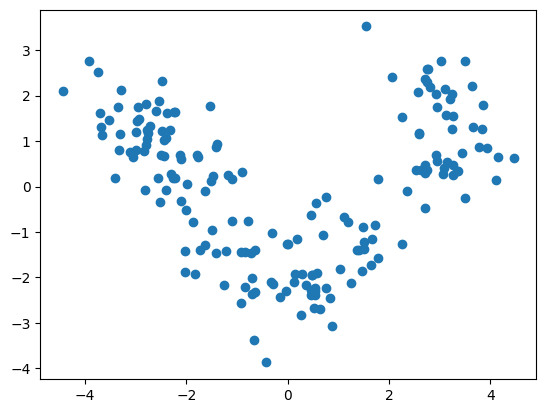

In [ ]:
plt.scatter(x,y)

In [ ]:
# Task 3: Clustering with Original Data:

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
wcss=[]
for i in range (1,15):
    kmeans=KMeans(n_clusters=i).fit(norm)
    wcss.append(kmeans.inertia_)


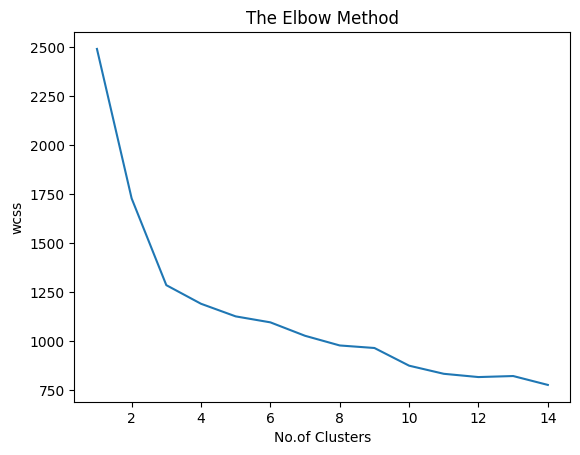

In [ ]:
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('No.of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
k_clusters=KMeans(n_clusters=3)
k_clusters.fit(norm)

KMeans(n_clusters=3)

In [ ]:
labels=k_clusters.predict(norm)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

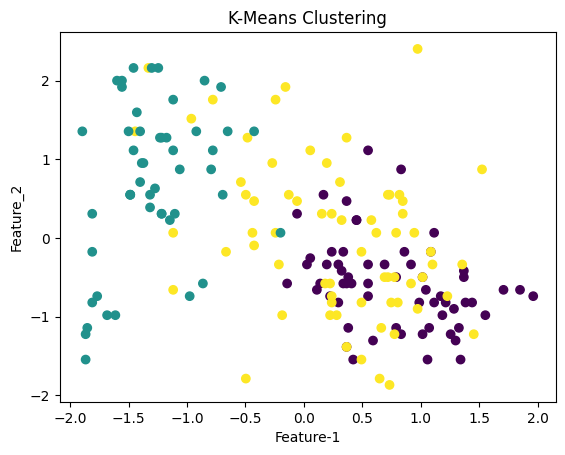

In [ ]:
plt.scatter(norm[:,12],norm[:,8],c=labels,cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature-1')
plt.ylabel('Feature_2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
kmeans_silhouette_score = silhouette_score(norm, labels)
print("K-Means Silhouette Score:", kmeans_silhouette_score)

K-Means Silhouette Score: 0.30753783238620536


# Task 4: Clustering with PCA Data:

In [ ]:
wcs=[]
for i in range (1,15):
    kmean=KMeans(n_clusters=i).fit(pca_val)
    wcs.append(kmean.inertia_)


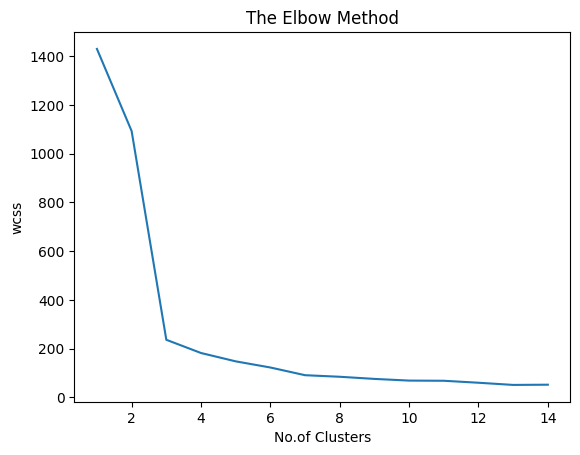

In [ ]:
plt.plot(range(1,15),wcs)
plt.title('The Elbow Method')
plt.xlabel('No.of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
k_clus1=KMeans(n_clusters=3)
k_clus1.fit(pca_val)

KMeans(n_clusters=3)

In [ ]:
labels1=k_clus1.predict(pca_val)
labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

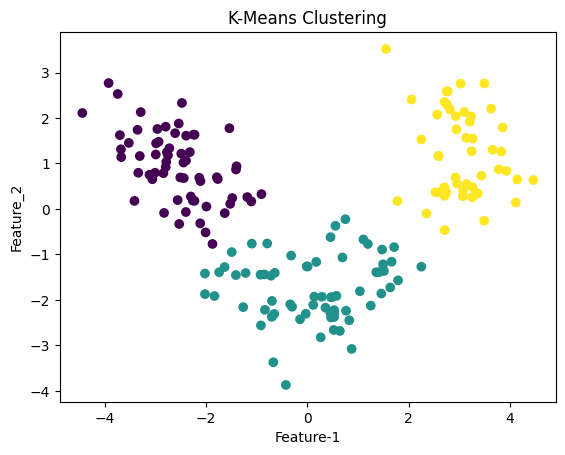

In [ ]:
plt.scatter(pca_val[:,0],pca_val[:,1],c=labels1,cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature-1')
plt.ylabel('Feature_2')
plt.show()


In [ ]:
kmeans_silhouette_score1 = silhouette_score(pca_val, labels1)
print("K-Means Silhouette Score:", kmeans_silhouette_score1)

K-Means Silhouette Score: 0.6024415520362845


# Task 5: Comparison and Analysis:

In [ ]:
comparing_cluster=pd.DataFrame({
    'ORIGINAL DATA':kmeans_silhouette_score,
    'PCA  DATA':kmeans_silhouette_score1
},index=(0,))
comparing_cluster

,ORIGINAL DATA,PCA DATA
0,0.307538,0.602442


In [ ]:
# 2. Discuss similarities/differences and impact of dimensionality reduction
print("Analysis:")
print("The clustering results with PCA-transformed data may show similar or improved performance compared to the original data.")
print("Dimensionality reduction with PCA can help in reducing noise and computational complexity while retaining the essential information.")

Analysis:
The clustering results with PCA-transformed data may show similar or improved performance compared to the original data.
Dimensionality reduction with PCA can help in reducing noise and computational complexity while retaining the essential information.


# Task 6: Conclusion and Insights

In [ ]:
# 1. Summarize key findings and insights
print("\nConclusion and Insights:")
print("In this analysis, we explored the dataset through EDA, applied PCA for dimensionality reduction, and performed clustering using K-means.")
print("We compared clustering results from the original data and PCA-transformed data, highlighting the impact of dimensionality reduction on clustering performance.")


Conclusion and Insights:
In this analysis, we explored the dataset through EDA, applied PCA for dimensionality reduction, and performed clustering using K-means.
We compared clustering results from the original data and PCA-transformed data, highlighting the impact of dimensionality reduction on clustering performance.


In [ ]:
# 2. Discuss practical implications and recommendations
print("\nPractical Implications and Recommendations:")
print("PCA and clustering are powerful techniques in data analysis, offering insights into underlying patterns and structures in data.")
print("When dealing with high-dimensional data, PCA can help in reducing dimensionality while preserving important information.")
print("However, it's essential to carefully choose the number of components in PCA to balance dimensionality reduction with information retention.")
print("Clustering algorithms like K-means can then be applied to the reduced-dimensional data to identify meaningful clusters.")
print("Overall, the choice between using PCA and clustering directly on the original dataset depends on the specific goals, computational resources, and complexity of the data.")


Practical Implications and Recommendations:
PCA and clustering are powerful techniques in data analysis, offering insights into underlying patterns and structures in data.
When dealing with high-dimensional data, PCA can help in reducing dimensionality while preserving important information.
However, it's essential to carefully choose the number of components in PCA to balance dimensionality reduction with information retention.
Clustering algorithms like K-means can then be applied to the reduced-dimensional data to identify meaningful clusters.
Overall, the choice between using PCA and clustering directly on the original dataset depends on the specific goals, computational resources, and complexity of the data.
